In [158]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/spotify-data-set/dataset.csv


In [159]:
# Открываем файл и присваиваем его
data_set_orig = pd.read_csv('/kaggle/input/spotify-data-set/dataset.csv')

# Расшифровка значений:

* **Unnamed - порядковый номер трека**
* **track_id - уникальный идентификатор трека**
* **album_name - название альбома**
* **track_name - название трека**
* **popularity - популярность трека от 0 до 100**
* **duration_ms - длительность в миллисекундах**
* **explicit - наличие текста (True или False)**
* **danceability - танцевальность от 0 до 1**
* **energy - энергичность от 0 до 1**
* **key - ключ**
* **loudness - общая громкость в децибелах**
* **mode - модальность (0 - минор, 1 - мажор)**
* **speechiness - наличие речи от 0 до 1**
* **acousticness - вероятность акустического исполнения, а не электронного от 0 до 1**
* **instrumentalness - вероятность инструментального исполнения, а не вокального от 0 до 1**
* **liveness - вероятность того, что исполнение было вживую перед аудиторией от 0 до 1**
* **valence - эмоциональная окраска, где 1 - позитивная, 0 - негативная**
* **tempo -  средний темп в BPM (ударах в минуту)**
* **time_signature - ритмический показатель размерности (число битов в такте)**
* **track_genre - название жанра**

почему существуют дублирующиеся песни с разными жанрами

signature.plot.pie(y='id', ylabel='', labels=signature['signature'], autopct='%1.0f%%')
plt.axis('equal')
plt.title('Отношение размерностей ритма')
plt.show()

* **Прредварительный просмотр**

In [160]:
# Сохраним изначальный dataset, а роботать будем в отдельном
data_set_work = data_set_orig.copy()
# Просмотр всех столбцов (одново было не видно)
pd.set_option('display.max_columns', None)
data_set_work

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108500,108500,6b5ZatK2kYAueryQZpBoX4,Astor Piazzolla,The Lausanne Concert (Live),Operacion Tango - Live,19,628173,False,0.325,0.2340,1.0,-14.881,0.0,0.0427,0.7970,0.322000,0.7030,0.162,68.826,4.0,tango
108501,108501,37IQaVXOJcr6LE6qzyvbvs,Ada Falcón,Serie De Oro,Ventarron,18,174600,False,0.615,0.2530,9.0,-10.067,0.0,0.0673,0.9860,0.000000,0.3980,0.500,116.031,4.0,tango
108502,108502,3ucjjE6eunnebQmC9qO0S6,Dino Saluzzi,Dino Saluzzi - RCA Victor 100 Años,La Humilde,21,135360,False,0.581,0.4950,9.0,-8.343,0.0,0.1280,0.5610,0.502000,0.0452,0.661,157.844,3.0,tango
108503,108503,7CofGCGki4IGpgtcFzuZOg,Aníbal Troilo;Alberto Marino,Toda Mi Vida,Cristal,19,201093,False,0.434,0.3320,2.0,-6.475,1.0,0.0352,0.9920,0.017700,0.1660,0.393,122.659,4.0,tango


* **Скорректируем названия столбцов.**

In [161]:
data_set_work = data_set_work.rename(columns = {'track_id':'id',
                                             'album_name':'album',
                                             'track_name':'track',
                                             'duration_ms':'duration',
                                               'track_genre':'genre',
                                               'time_signature': 'signature'})

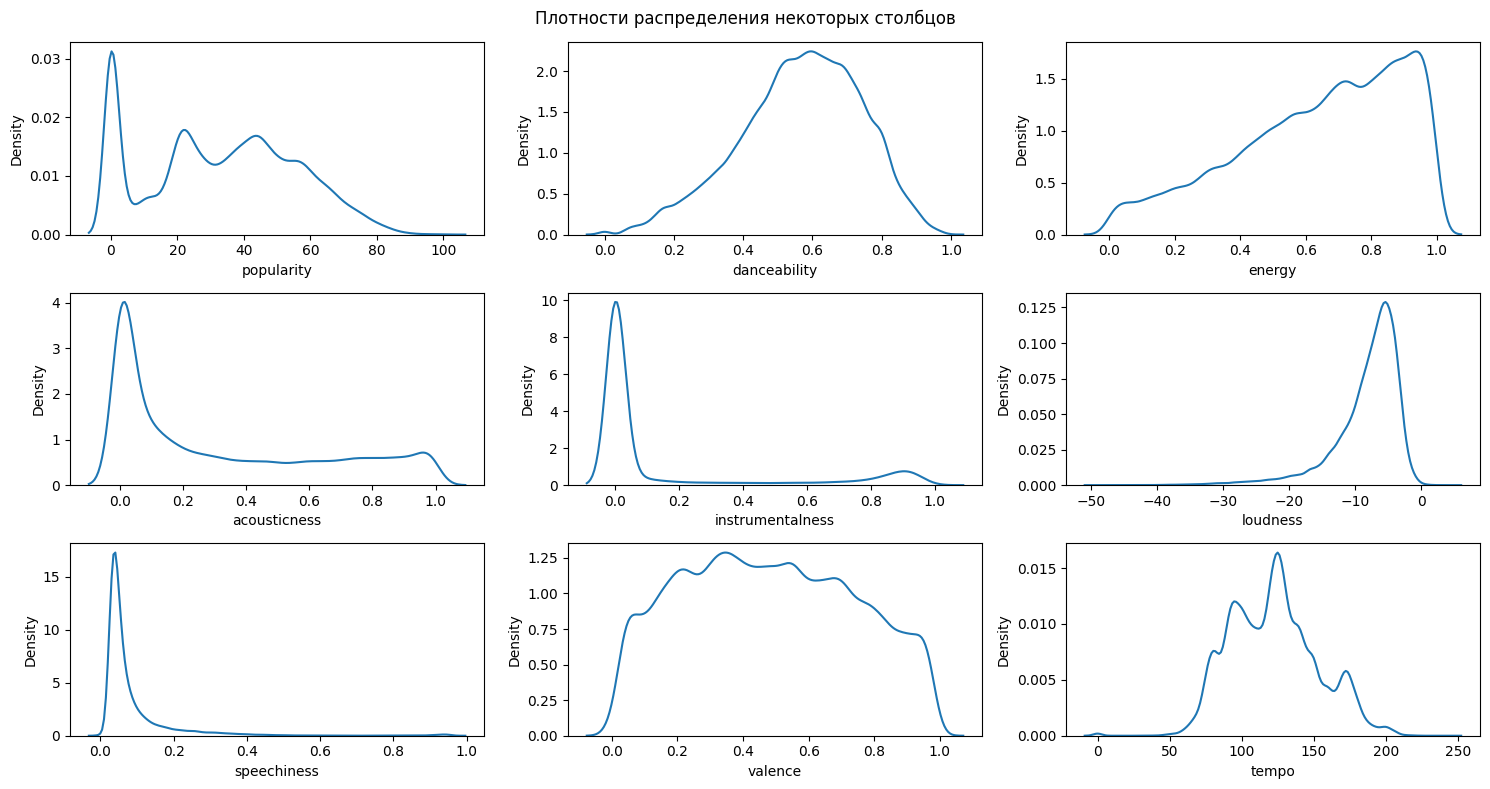

In [162]:
#plt.scatter(data_set_work['energy'], data_set_work['popularity']);
fig, axes = plt.subplots(3, 3, figsize=(15, 8)) #строки,колонки
sns.kdeplot(data=data_set_work, x='popularity', ax=axes[0, 0])
sns.kdeplot(data=data_set_work, x='danceability', ax=axes[0, 1])
sns.kdeplot(data=data_set_work, x='energy', ax=axes[0, 2])
sns.kdeplot(data=data_set_work, x='acousticness', ax=axes[1, 0])
sns.kdeplot(data=data_set_work, x='instrumentalness', ax=axes[1, 1])
sns.kdeplot(data=data_set_work, x='loudness', ax=axes[1, 2])
sns.kdeplot(data=data_set_work, x='speechiness', ax=axes[2, 0])
sns.kdeplot(data=data_set_work, x='valence', ax=axes[2, 1])
sns.kdeplot(data=data_set_work, x='tempo', ax=axes[2, 2])
fig.suptitle('Плотности распределения некоторых столбцов') 
plt.tight_layout() 
plt.show()

***Заметим, что у плотностей популярности, акустичности, инструментальности и речевости есть много значений близких к нулю.***

# ===== EDA =====

* **Предварительная информация**

In [163]:
data_set_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108505 entries, 0 to 108504
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        108505 non-null  int64  
 1   id                108505 non-null  object 
 2   artists           108504 non-null  object 
 3   album             108504 non-null  object 
 4   track             108504 non-null  object 
 5   popularity        108505 non-null  int64  
 6   duration          108505 non-null  int64  
 7   explicit          108504 non-null  object 
 8   danceability      108504 non-null  float64
 9   energy            108504 non-null  float64
 10  key               108504 non-null  float64
 11  loudness          108504 non-null  float64
 12  mode              108504 non-null  float64
 13  speechiness       108504 non-null  float64
 14  acousticness      108504 non-null  float64
 15  instrumentalness  108504 non-null  float64
 16  liveness          10

***Видим, что есть одна строчка с пропусками, которую мы видим на предпросмотре***

* **Проверим наличие повторяющихся строк**

In [164]:
data_set_work.duplicated(keep='first').value_counts()

False    108505
Name: count, dtype: int64

***Есть аж 444 повряющихся строк( в первый раз они отображались, но теперь нет; после удаления увидим, что строк стало меньше на 444)***

* **Удалим лишние строчки и столбцы, заодно посмотрим в каих интервалах лежат значения каждого столбца**

In [165]:
data_set_work = data_set_work.drop(columns=['Unnamed: 0'])
data_set_work = data_set_work.dropna()
data_set_work = data_set_work.drop_duplicates(keep='first')
data_set_work.describe()

,popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,signature
count,108059.000000,1.080590e+05,108059.000000,108059.000000,108059.000000,108059.000000,108059.000000,108059.000000,108059.000000,108059.000000,108059.000000,108059.000000,108059.000000,108059.000000
mean,33.147725,2.261509e+05,0.566252,0.642020,5.302566,-8.233941,0.643010,0.085246,0.317257,0.149189,0.214128,0.479095,122.104834,3.903423
std,22.560143,1.056688e+05,0.174074,0.252201,3.559328,5.062557,0.479114,0.107099,0.332247,0.304331,0.190952,0.259045,30.166335,0.434647
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.734130e+05,0.455000,0.472000,2.000000,-9.997000,0.000000,0.035900,0.017500,0.000000,0.098000,0.266000,98.942000,4.000000
50%,34.000000,2.120260e+05,0.579000,0.686000,5.000000,-6.946000,1.000000,0.049100,0.174000,0.000036,0.132000,0.471000,121.980000,4.000000
75%,50.000000,2.592400e+05,0.694000,0.855000,8.000000,-4.949000,1.000000,0.085200,0.600000,0.034800,0.275000,0.688000,140.134000,4.000000
max,100.000000,5.237295e+06,0.984000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


* **Узнаем какие значения могут принимать столбцы с размерностью ритма**

In [166]:
signature = data_set_work['signature'].value_counts().sort_index(ascending=True).to_frame()
signature['percent'] = signature['count']/signature['count'].sum() 
signature['percent'] = signature['percent'].map('{:.2%}'.format)
signature

,count,percent
signature,,
0.0,159,0.15%
1.0,930,0.86%
3.0,8759,8.11%
4.0,96462,89.27%
5.0,1749,1.62%


##### ***Размерности бывают от 0 до 5, кроме 2, большинство треков имеют размерность 4 .***

* **Узнаем какие значения могут принимать столбцы с ключами** 

In [167]:
data_set_work['key'].value_counts().sort_index(ascending=True)

key
0.0     12431
1.0     10193
2.0     11062
3.0      3402
4.0      8535
5.0      8922
6.0      7485
7.0     12499
8.0      6975
9.0     10780
10.0     7031
11.0     8744
Name: count, dtype: int64

***Ключ имеет значения от 0 до 11.***

* **Узнаем какие значения могут принимать столбцы с названием жанров**

In [168]:
with pd.option_context('display.max_rows', None):
    print(data_set_work['genre'].value_counts(ascending=True))

genre
tango                 504
romance               904
classical             933
german                963
dance                 965
honky-tonk            981
iranian               988
latin                 990
kids                  991
hip-hop               991
opera                 992
edm                   993
pop                   993
j-dance               993
latino                993
party                 994
new-age               994
club                  995
comedy                996
power-pop             996
drum-and-bass         996
psych-rock            996
indie                 997
black-metal           997
j-pop                 998
metal                 998
minimal-techno        998
grindcore             998
study                 998
heavy-metal           998
salsa                 998
hardstyle             998
hard-rock             998
groove                998
k-pop                 998
piano                 998
idm                   998
brazil                998
deep-h

***В таблице собраны приблизительно по 1000 треков каждого жанра, кроме танго, их в два раза меньше.***

* **На пред просмотре все треки имеют отрицательную общую громкость, построим график и посмотрим, как распределяется частота значений от их показателя.**

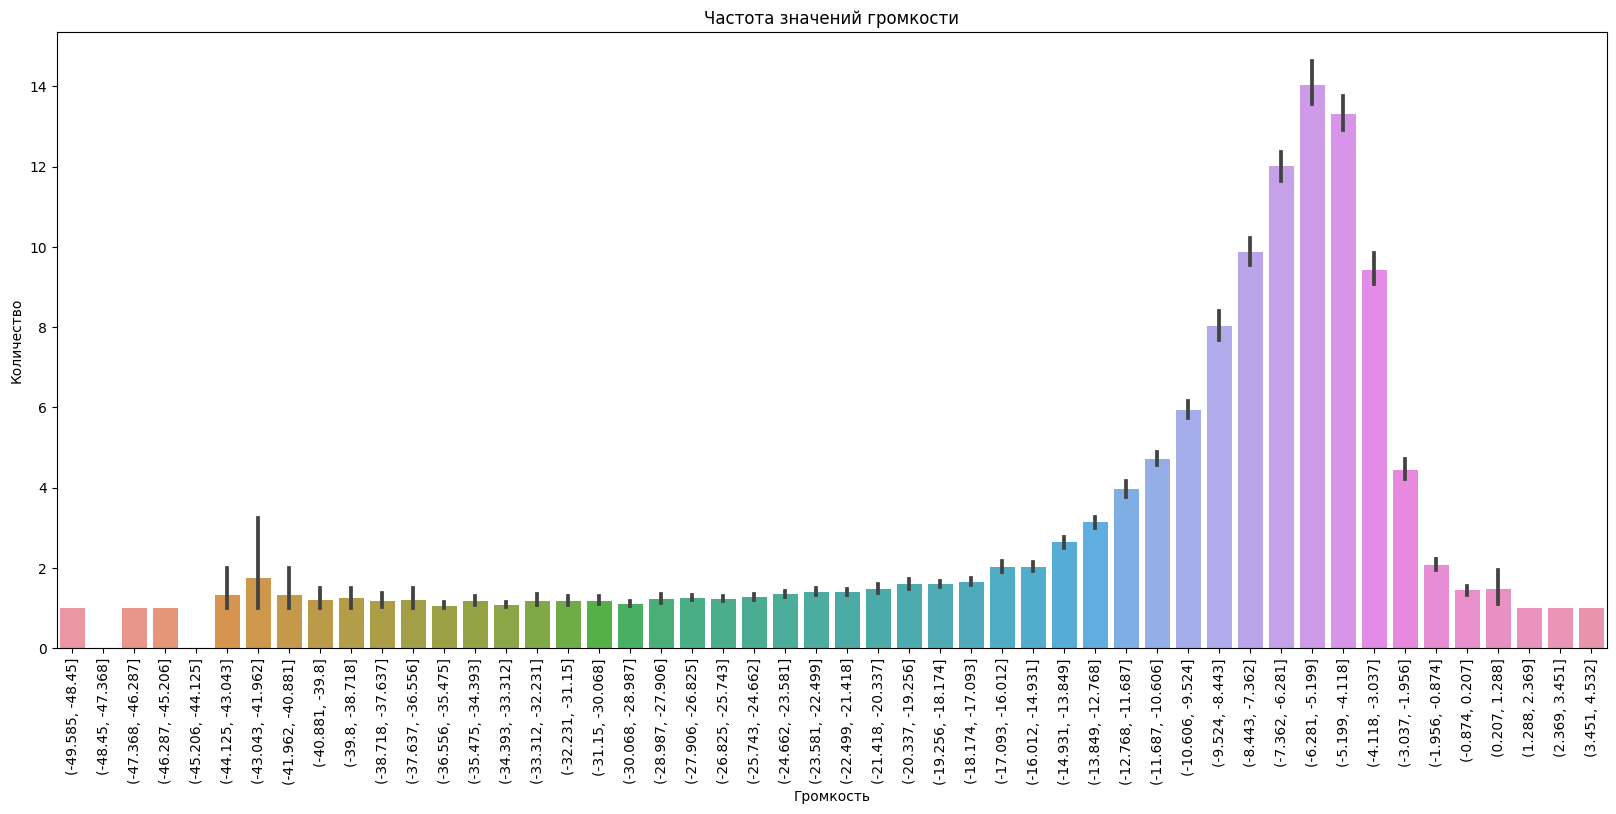

In [169]:
loudness_count = data_set_work.groupby(['loudness']
                    ,as_index=False)['id'].agg('count').sort_index(ascending=True)
loudness_count['cut_loudness'] = pd.cut(loudness_count['loudness'],50)
plt.figure(figsize=(20, 8))
sns.barplot(data=loudness_count,x='cut_loudness',y='id')
plt.title('Частота значений громкости')
plt.xlabel('Громкость')
plt.xticks(rotation=90)
plt.ylabel('Количество')
plt.show()

***Заметим, что большинство значений лежит примерно в интервале от -10 до -3.***

# ====== Ресерч-анализ =====

# Гипотеза: минорные треки имеют негативную эмоциональные окраску, а мажорные - позитивную.

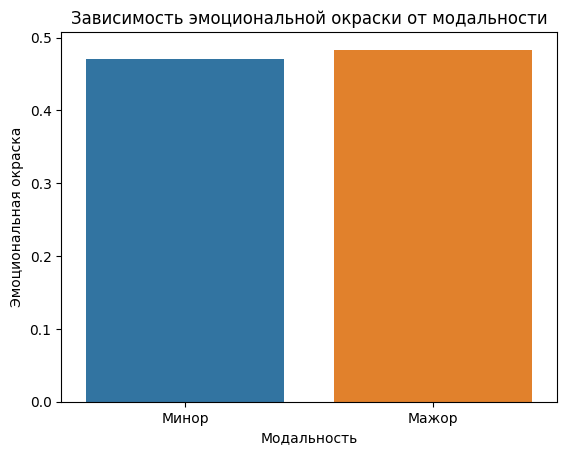

In [170]:
mode_valence = data_set_work.groupby(['mode']
                    ,as_index=False)['valence'].agg('mean')
sns.barplot(data=mode_valence,x='mode',y='valence')
plt.title('Зависимость эмоциональной окраски от модальности')
plt.xlabel('Модальность')
plt.xticks(mode_valence['mode'],labels=('Минор', 'Мажор'))
plt.ylabel('Эмоциональная окраска')
plt.show()

***Вывод: модальность не влияет на эмоциональную окраску, так как у модальностей средние значения по этому параметру почти одинаковые***

# Гипотеза: в песнях с текстом больше вероятность наличия речи

* **Банально, но в предыдущей гипотезе я был тоже уверен**

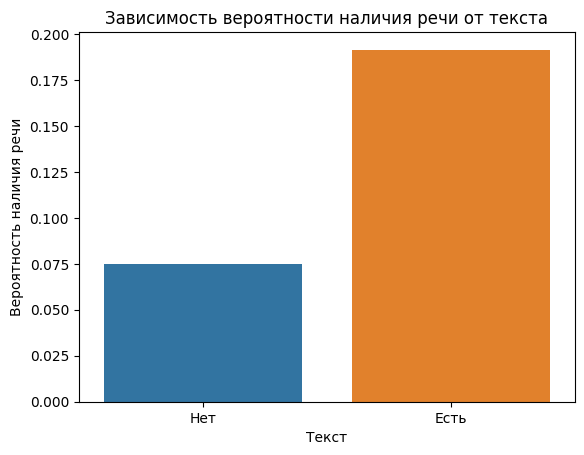

In [171]:
explicit_speechiness = data_set_work.groupby(['explicit']
                    ,as_index=False)['speechiness'].agg('mean')
sns.barplot(data=explicit_speechiness,x='explicit',y='speechiness')
plt.title('Зависимость вероятности наличия речи от текста')
plt.xlabel('Текст')
plt.xticks(mode_valence['mode'],labels=('Нет', 'Есть'))
plt.ylabel('Вероятность наличия речи')
plt.show()

***Вот это же ничего себе, речи в треках с явным текстом почти в 2,5 раз больше***

# Гипотеза: в таблице есть одинаковые треки с разными характеристиками.

* **Узнаем есть ли повторы по id и чем они отличаются**

In [172]:
repeat_id = data_set_work[data_set_work['id'].isin(data_set_work['id']
                [data_set_work['id'].duplicated()])].sort_values('id')
repeat_id

,id,artists,album,track,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,signature,genre
103211,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1.0,-6.644,0.0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4.0,soul
15028,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1.0,-6.644,0.0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4.0,chill
100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2.0,-4.589,1.0,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1.0,ska
85578,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2.0,-4.589,1.0,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1.0,punk-rock
91801,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1.0,-5.230,1.0,0.0747,0.001210,0.000000,0.0995,0.236,148.033,4.0,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22326,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,1.0,-5.412,1.0,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4.0,death-metal
72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,1.0,-5.412,1.0,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4.0,metalcore
91401,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7.0,-6.099,0.0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4.0,rock
3100,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7.0,-6.099,0.0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4.0,alternative


***Списке есть повторяющиеся треки с разными жанрами, считаю нужно выжелить поджанры в отдельный столбец(как минимум даже если мы не будем обучать модель на жанрах у нас не будет повторяющихся треков что предотвратит переобучение)***

* **Пока просто число жанров трека в столбце number_genre**

In [173]:
number_genre = data_set_work.groupby('id',as_index=False)['genre'].size().rename(columns = {'size':
                                                                                    'number_genre'})
data_set_work = data_set_work.merge(number_genre, on='id')
data_set_work

,id,artists,album,track,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,signature,genre,number_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic,2
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic,1
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108054,5qysofkEsc4u8TMiOKbydJ,Aníbal Troilo;Roberto Fiorentino,Milongas para Bailar,Ficha de Oro,19,169893,False,0.613,0.5150,4.0,-6.840,1.0,0.0359,0.9720,0.105000,0.1330,0.828,109.646,4.0,tango,1
108055,6b5ZatK2kYAueryQZpBoX4,Astor Piazzolla,The Lausanne Concert (Live),Operacion Tango - Live,19,628173,False,0.325,0.2340,1.0,-14.881,0.0,0.0427,0.7970,0.322000,0.7030,0.162,68.826,4.0,tango,1
108056,37IQaVXOJcr6LE6qzyvbvs,Ada Falcón,Serie De Oro,Ventarron,18,174600,False,0.615,0.2530,9.0,-10.067,0.0,0.0673,0.9860,0.000000,0.3980,0.500,116.031,4.0,tango,1
108057,3ucjjE6eunnebQmC9qO0S6,Dino Saluzzi,Dino Saluzzi - RCA Victor 100 Años,La Humilde,21,135360,False,0.581,0.4950,9.0,-8.343,0.0,0.1280,0.5610,0.502000,0.0452,0.661,157.844,3.0,tango,1


# Гипотеза: популярность треков зависит от популярности исполнителей

* **Это можно доказать узнав дисперсию по популярности для всех треков каждого исполнителя. Если дисперсия для популярных исполнителей маленькая, то гипотеза верна.**

In [174]:
# приведем все названия к нижнему регистру(бывают одинаковые названия, отличающиеся регистром)
data_set_work['track'] = data_set_work['track'].str.lower()
data_set_work['artists'] = data_set_work['artists'].str.lower()
data_set_work['album'] = data_set_work['album'].str.lower()
popularity_artists = data_set_work.groupby(['artists'],as_index=False)['popularity'].agg(['var', 'mean']).sort_values('mean')
#popularity_artists = popularity_artists.fillna(0)
popularity_artists

,artists,var,mean
14891,lasso;danna paola,NaN,0.0
18613,mýa,NaN,0.0
18526,musiq soulchild,0.000000,0.0
3284,bill frisell,NaN,0.0
3308,billy currington,0.000000,0.0
...,...,...,...
2579,bad bunny;bomba estéreo,0.333333,94.5
2581,bad bunny;chencho corleone,0.000000,97.0
16555,manuel turizo,0.000000,98.0
3374,bizarrap;quevedo,NaN,99.0


***Как я понял, дисперсия 0, когда значения одинаковы, и NaN - когда значение одно.***

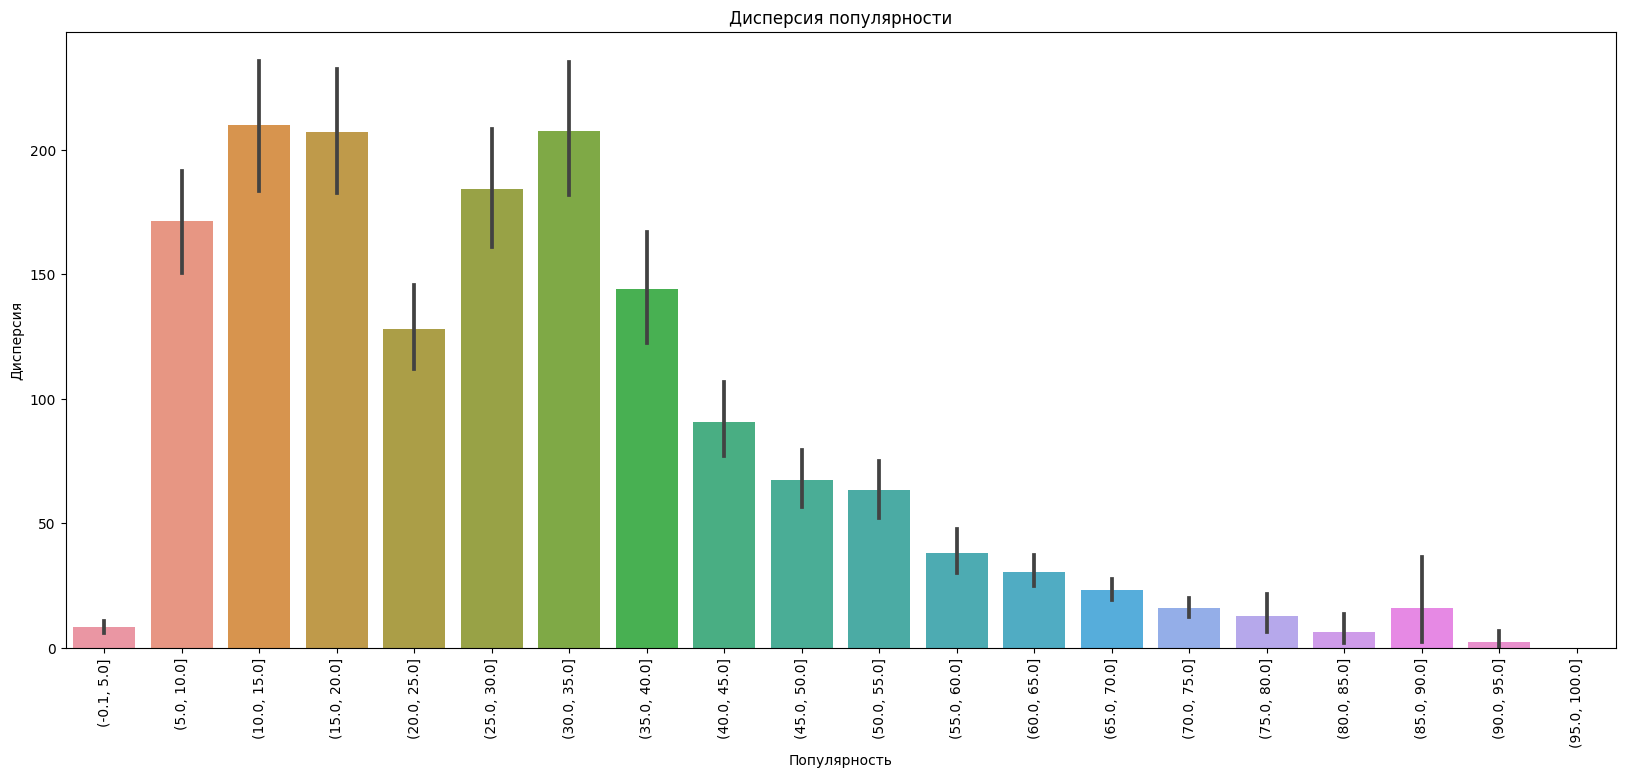

In [175]:
popularity_artists['mean'] = pd.cut(popularity_artists['mean'],20)
plt.figure(figsize=(20, 8))
sns.barplot(data=popularity_artists,x='mean',y='var')
plt.title('Дисперсия популярности')
plt.xlabel('Популярность')
plt.xticks(rotation=90)
plt.ylabel('Дисперсия')
plt.show()

***Можно сказать гипотеза подтвердилась, потому что чем выше популярность тем меньше дисперсия, значит есть популярные исполнители, чья популярность сказывается на популярность их треков, а у непопулярных исполнителей есть только несколько хитов***

* **Добавим столбец с числом исполнителей number_artists.**

In [176]:

data_set_work['number_artists'] = data_set_work['artists'].str.count(',') + data_set_work['artists'].str.count(';') + data_set_work['artists'].str.count('&') + 1
#data_set_work['feat'] = True
#data_set_work.loc[data_set_work['number_artists'] > 1, 'feat'] = False
#data_set_work.insert(1, 'feat', data_set_work.pop('feat'))
data_set_work.insert(1, 'number_artists', data_set_work.pop('number_artists'))
data_set_work
#print(np.max(data_set_work['number_artists'])) 
#data_set_work[data_set_work['number_artists'] == 38]
# оказывается исполнителей может быть аж 38

,id,number_artists,artists,album,track,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,signature,genre,number_genre
0,5SuOikwiRyPMVoIQDJUgSV,1,gen hoshino,comedy,comedy,73,230666,False,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic,4
1,4qPNDBW1i3p13qLCt0Ki3A,1,ben woodward,ghost (acoustic),ghost - acoustic,55,149610,False,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic,2
2,1iJBSr7s7jYXzM8EGcbK5b,2,ingrid michaelson;zayn,to begin again,to begin again,57,210826,False,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic,1
3,6lfxq3CG4xtTiEg7opyCyx,1,kina grannis,crazy rich asians (original motion picture sou...,can't help falling in love,71,201933,False,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic,1
4,5vjLSffimiIP26QG5WcN2K,1,chord overstreet,hold on,hold on,82,198853,False,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108054,5qysofkEsc4u8TMiOKbydJ,2,aníbal troilo;roberto fiorentino,milongas para bailar,ficha de oro,19,169893,False,0.613,0.5150,4.0,-6.840,1.0,0.0359,0.9720,0.105000,0.1330,0.828,109.646,4.0,tango,1
108055,6b5ZatK2kYAueryQZpBoX4,1,astor piazzolla,the lausanne concert (live),operacion tango - live,19,628173,False,0.325,0.2340,1.0,-14.881,0.0,0.0427,0.7970,0.322000,0.7030,0.162,68.826,4.0,tango,1
108056,37IQaVXOJcr6LE6qzyvbvs,1,ada falcón,serie de oro,ventarron,18,174600,False,0.615,0.2530,9.0,-10.067,0.0,0.0673,0.9860,0.000000,0.3980,0.500,116.031,4.0,tango,1
108057,3ucjjE6eunnebQmC9qO0S6,1,dino saluzzi,dino saluzzi - rca victor 100 años,la humilde,21,135360,False,0.581,0.4950,9.0,-8.343,0.0,0.1280,0.5610,0.502000,0.0452,0.661,157.844,3.0,tango,1


# Гипотеза: наибольшую популярность имеют треки с позитивной эмоциональной окраской

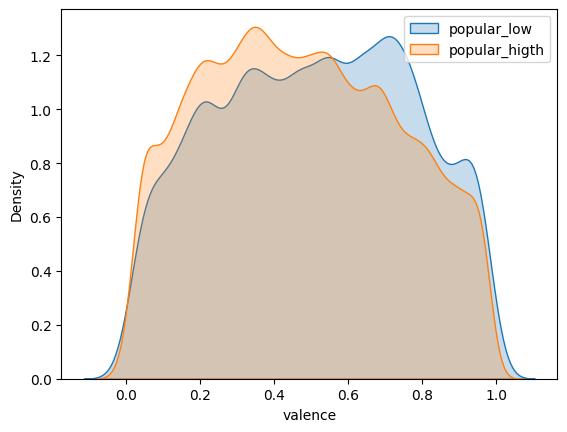

In [177]:
len_track_name= data_set_work[['valence', 'popularity']]
popular_low = len_track_name[len_track_name['popularity'] < 0.3]
popular_higth = len_track_name[len_track_name['popularity'] > 0.7]
sns.kdeplot(data=popular_low, x='valence', fill=True , label='popular_low')
sns.kdeplot(data=popular_higth, x='valence', fill=True , label='popular_higth')
plt.legend()
plt.show()

***Гипотеза опровержена, так как график в наибольшей  популярностью наклонен в сторону с негативной окраской.***

# Гипотеза: наибольшую популярность имеют треки с определенным ритмом

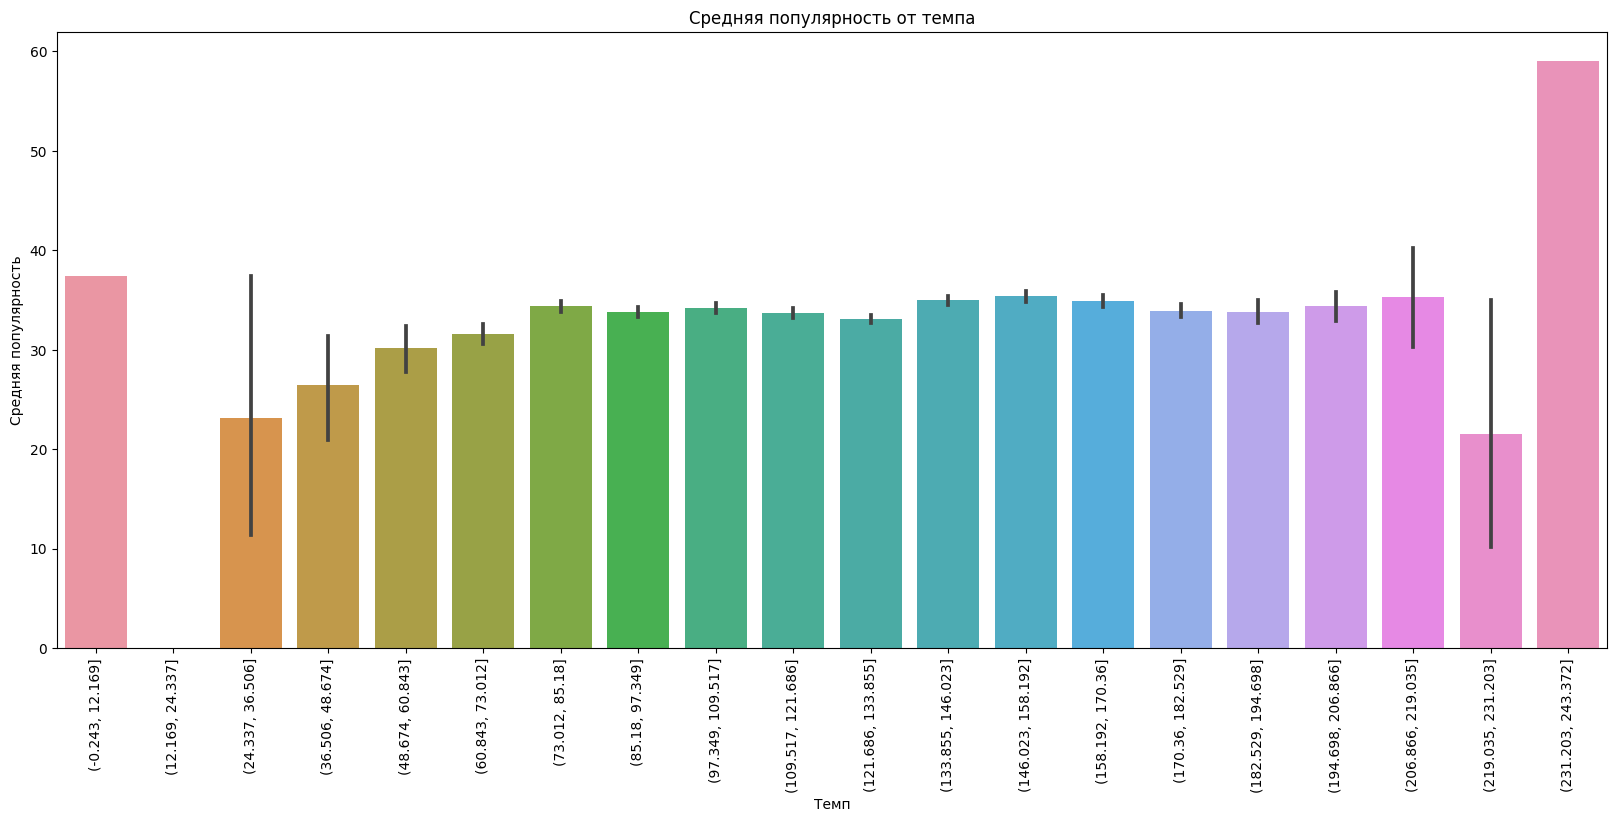

In [178]:
popularity_tempo = data_set_work.groupby(['tempo'],as_index=False)['popularity'].agg('mean').sort_values('tempo')
popularity_tempo['tempo'] = pd.cut(popularity_tempo['tempo'],20)
plt.figure(figsize=(20, 8))
sns.barplot(data=popularity_tempo,x='tempo',y='popularity')
plt.title('Средняя популярность от темпа')
plt.xlabel('Темп')
plt.xticks(rotation=90)
plt.ylabel('Средняя популярность')
plt.show()

***У треков с крайне высоким темпом популярность почти в два раза выше.***

# ===== Feature engineering =====

* **Добавим столбец с длинной названия к другим добавленным мною новым столбцам**

In [179]:
data_set_work['len_track_name'] = data_set_work['track'].str.len()
data_set_work.insert(4, 'len_track_name', data_set_work.pop('len_track_name'))
data_set_work

,id,number_artists,artists,album,len_track_name,track,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,signature,genre,number_genre
0,5SuOikwiRyPMVoIQDJUgSV,1,gen hoshino,comedy,6,comedy,73,230666,False,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic,4
1,4qPNDBW1i3p13qLCt0Ki3A,1,ben woodward,ghost (acoustic),16,ghost - acoustic,55,149610,False,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic,2
2,1iJBSr7s7jYXzM8EGcbK5b,2,ingrid michaelson;zayn,to begin again,14,to begin again,57,210826,False,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic,1
3,6lfxq3CG4xtTiEg7opyCyx,1,kina grannis,crazy rich asians (original motion picture sou...,26,can't help falling in love,71,201933,False,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic,1
4,5vjLSffimiIP26QG5WcN2K,1,chord overstreet,hold on,7,hold on,82,198853,False,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108054,5qysofkEsc4u8TMiOKbydJ,2,aníbal troilo;roberto fiorentino,milongas para bailar,12,ficha de oro,19,169893,False,0.613,0.5150,4.0,-6.840,1.0,0.0359,0.9720,0.105000,0.1330,0.828,109.646,4.0,tango,1
108055,6b5ZatK2kYAueryQZpBoX4,1,astor piazzolla,the lausanne concert (live),22,operacion tango - live,19,628173,False,0.325,0.2340,1.0,-14.881,0.0,0.0427,0.7970,0.322000,0.7030,0.162,68.826,4.0,tango,1
108056,37IQaVXOJcr6LE6qzyvbvs,1,ada falcón,serie de oro,9,ventarron,18,174600,False,0.615,0.2530,9.0,-10.067,0.0,0.0673,0.9860,0.000000,0.3980,0.500,116.031,4.0,tango,1
108057,3ucjjE6eunnebQmC9qO0S6,1,dino saluzzi,dino saluzzi - rca victor 100 años,10,la humilde,21,135360,False,0.581,0.4950,9.0,-8.343,0.0,0.1280,0.5610,0.502000,0.0452,0.661,157.844,3.0,tango,1


* **Позаимствую одну идею с тем, что буду определять сингл**

In [180]:
def _single(x):
    if x['album'] == x['track']:
        return True
    else:
        return False

In [181]:
data_set_work['sigle'] = data_set_work.apply(_single, axis=1)
data_set_work.insert(3, 'sigle', data_set_work.pop('sigle'))
data_set_work

,id,number_artists,artists,sigle,album,len_track_name,track,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,signature,genre,number_genre
0,5SuOikwiRyPMVoIQDJUgSV,1,gen hoshino,True,comedy,6,comedy,73,230666,False,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic,4
1,4qPNDBW1i3p13qLCt0Ki3A,1,ben woodward,False,ghost (acoustic),16,ghost - acoustic,55,149610,False,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic,2
2,1iJBSr7s7jYXzM8EGcbK5b,2,ingrid michaelson;zayn,True,to begin again,14,to begin again,57,210826,False,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic,1
3,6lfxq3CG4xtTiEg7opyCyx,1,kina grannis,False,crazy rich asians (original motion picture sou...,26,can't help falling in love,71,201933,False,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic,1
4,5vjLSffimiIP26QG5WcN2K,1,chord overstreet,True,hold on,7,hold on,82,198853,False,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108054,5qysofkEsc4u8TMiOKbydJ,2,aníbal troilo;roberto fiorentino,False,milongas para bailar,12,ficha de oro,19,169893,False,0.613,0.5150,4.0,-6.840,1.0,0.0359,0.9720,0.105000,0.1330,0.828,109.646,4.0,tango,1
108055,6b5ZatK2kYAueryQZpBoX4,1,astor piazzolla,False,the lausanne concert (live),22,operacion tango - live,19,628173,False,0.325,0.2340,1.0,-14.881,0.0,0.0427,0.7970,0.322000,0.7030,0.162,68.826,4.0,tango,1
108056,37IQaVXOJcr6LE6qzyvbvs,1,ada falcón,False,serie de oro,9,ventarron,18,174600,False,0.615,0.2530,9.0,-10.067,0.0,0.0673,0.9860,0.000000,0.3980,0.500,116.031,4.0,tango,1
108057,3ucjjE6eunnebQmC9qO0S6,1,dino saluzzi,False,dino saluzzi - rca victor 100 años,10,la humilde,21,135360,False,0.581,0.4950,9.0,-8.343,0.0,0.1280,0.5610,0.502000,0.0452,0.661,157.844,3.0,tango,1


# ===== Корелляции =====

* **Подготовим данные для расчета корелляции**

In [182]:
data_set_matrix = data_set_work.drop(['id', 'album', 'artists', 'album', 'track', 'genre'], axis=1)
data_set_matrix = data_set_matrix.astype('float64')

* **Матрица корелляций**

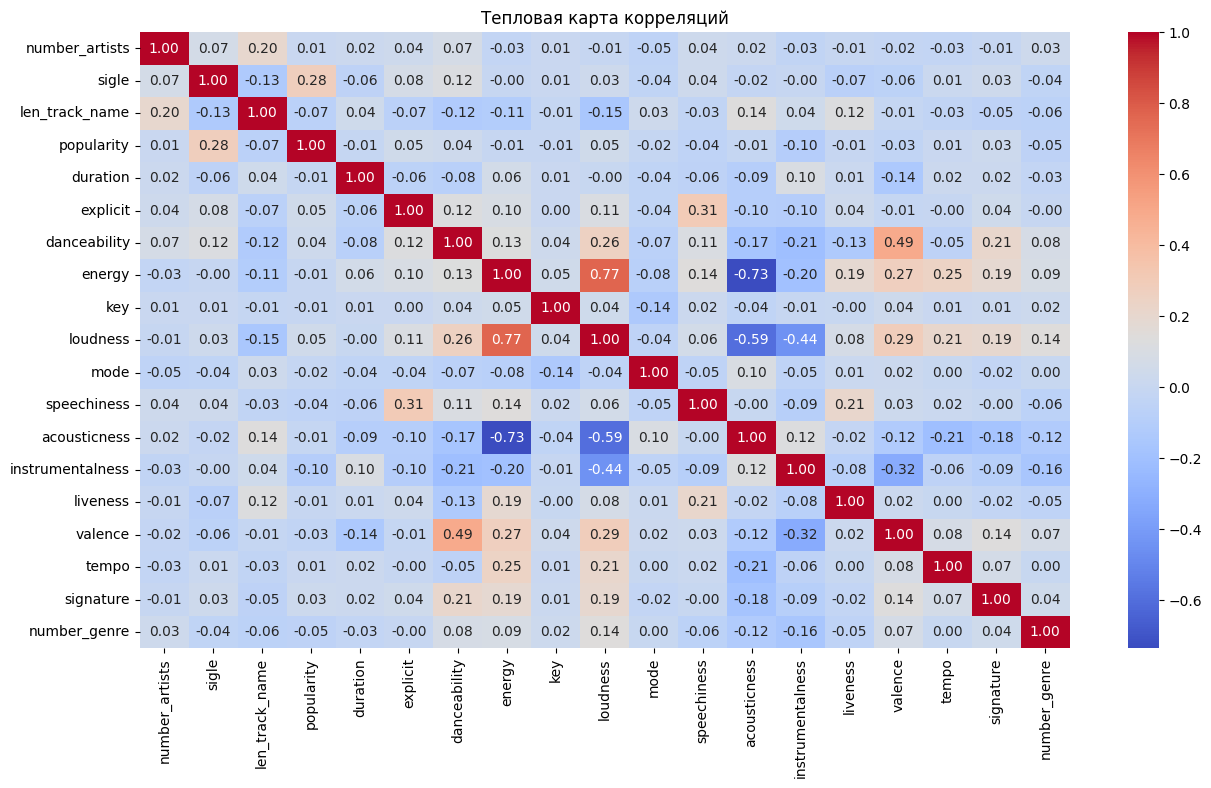

In [183]:
corr_matrix = data_set_matrix.corr()
plt.figure(figsize=(15, 8))
tem_map = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
tem_map.set_title('Тепловая карта корреляций')
plt.show()

***Видим, что высоко кореллируют громкость с энергичностью, позитивность с танцевальностью, наличие текста с кол-вом слов, вокальность с громкостью и негативностью, электронность с энергичностью и громкостью. Заметим что с популярностью ни один признак не кореллирует, поэтому нет смысла рассматривать его отдельно как таргет.***

* **Приведу пример корелляции с таргетом в виде громкости**


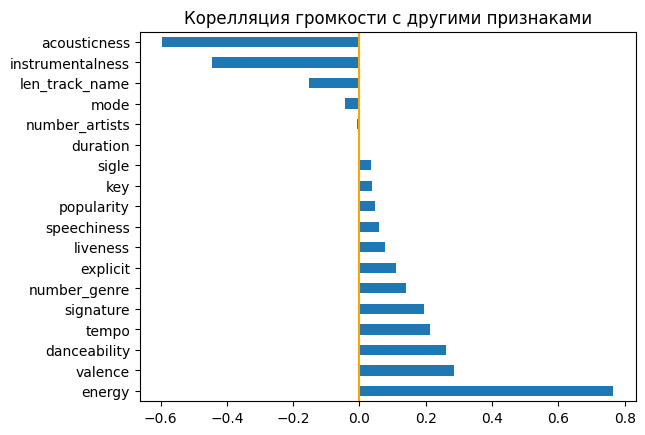

In [184]:
target_corr = corr_matrix['loudness'].sort_values(ascending=False)
# Создаем горизонтальную столбчатую диаграмму
target_corr[1:].plot(kind='barh')
plt.axvline(x=0, color='orange',linestyle='-')
plt.title('Корелляция громкости с другими признаками')
plt.show()

***Громкость больше всего кореллирует с другими параметрами.***

# ===== Машинное обучение =====

**Векторизуем категориальные признаки и можем приступать к машинному обучению**

метрики MAE, MSE, RMSE, R2, MAPE

MinMaxScaler стардартизатор маштабирования
rige laso регулиризаторы 
dropout для нейросетей

вывод коэф.
linear_regression_model.fit(scaled_df, target) 
sorted(list(zip(boston_df.columns, linear_regression_model.coef_)), 
       key=lambda x: abs(x[1]))

In [185]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures, LabelEncoder

* **Векторизация данных**

In [186]:
vectorizer = LabelEncoder()
data_set_work = data_set_work.drop(columns = ['id','artists','album','track'])
data_set_work['genre'] = vectorizer.fit_transform(data_set_work['genre'])
data_set_work = data_set_work.astype('float64')

* **Выделение предсказываемого признака**

In [187]:
x = data_set_work.drop(columns = 'popularity')
y = data_set_work['popularity']
features = x.columns.tolist()

*  **Функции расчета метрик**

In [188]:
def _mae(y_true, y_pred):
    n = len(y_true)
    return 1 / n * np.sum(np.abs(y_true - y_pred))

def _mse(y_true, y_pred):
    n = len(y_true)
    return 1 / n * np.sum((y_true - y_pred) ** 2)

def _r2(y_true, y_pred):
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)
    return 1 - ssr / sst

def _mape(y_true, y_pred):
    n = len(y_true)
    numerator = np.abs(y_true - y_pred)
    denominator = np.abs(y_true)
    return  1 / n * np.sum(numerator / denominator)

def _smape(y_true, y_pred):
    n = len(y_true)
    numerator = 2 * np.abs(y_true - y_pred)
    denominator = (y_true + y_pred)
    return  1 / n * np.sum(numerator / denominator)

def _msle(y_true, y_pred, c=1):
    n = len(y_true)
    return 1 / n * np.sum((np.log(y_true + c) - np.log(y_pred + c)) ** 2)

# Пробная модель линейной регрессии

* **Мне она нужна, чтобы понять в каких диапазонах измеряются метрики и как на них влияют методы стандартизации.**

In [189]:
from sklearn.linear_model import LinearRegression

# Методы стандартизации
scaler_std = StandardScaler()
x_std = scaler_std.fit_transform(x)
scaler_minmax =  MinMaxScaler()
x_minmax = scaler_minmax.fit_transform(x)
scaler_robust = RobustScaler()
x_robust = scaler_robust.fit_transform(x)
scalers = {'scaler_std': x_std ,'scaler_minmax': x_minmax ,'scaler_robust': x_robust }
# Таблица для результатов
results = pd.DataFrame()
results['metrics'] = ['mae','mse','rmse','r2','mape', 'smape', 'msle']

for scaler, x in scalers.items():
    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Создание модели с заданными параметрами
    linear_reg = LinearRegression()
    
    # Обучение модели
    linear_reg.fit(X_train, y_train)
    
    # Предсказание на тестовой выборке
    y_pred = linear_reg.predict(X_test)

    # Оценки качества модели
    mae = _mae(y_test, y_pred)
    mse = _mse(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = _r2(y_test, y_pred)
    mape = _mape(y_test, y_pred)
    smape = _smape(y_test, y_pred)
    msle =_msle(y_test, y_pred)
    results[scaler] = [mae, mse, rmse, r2, mape, smape , msle]

# Вывод оценок
results

,metrics,scaler_std,scaler_minmax,scaler_robust
0,mae,17.904060,17.904060,17.904060
1,mse,460.915181,460.915181,460.915181
2,rmse,21.468935,21.468935,21.468935
3,r2,0.099024,0.099024,0.099024
4,mape,inf,inf,inf
5,smape,0.698896,0.698896,0.698896
6,msle,2.177012,2.177012,2.177012


***Значения метрик почти не меняются от выбора метода стандартизации (этого не видно из-за сокращения чисел), что довольно странно, но ошибки в коде у себя я не нашел***

* **Узнаем какие веса линейная регрессия дает различным признакам.**

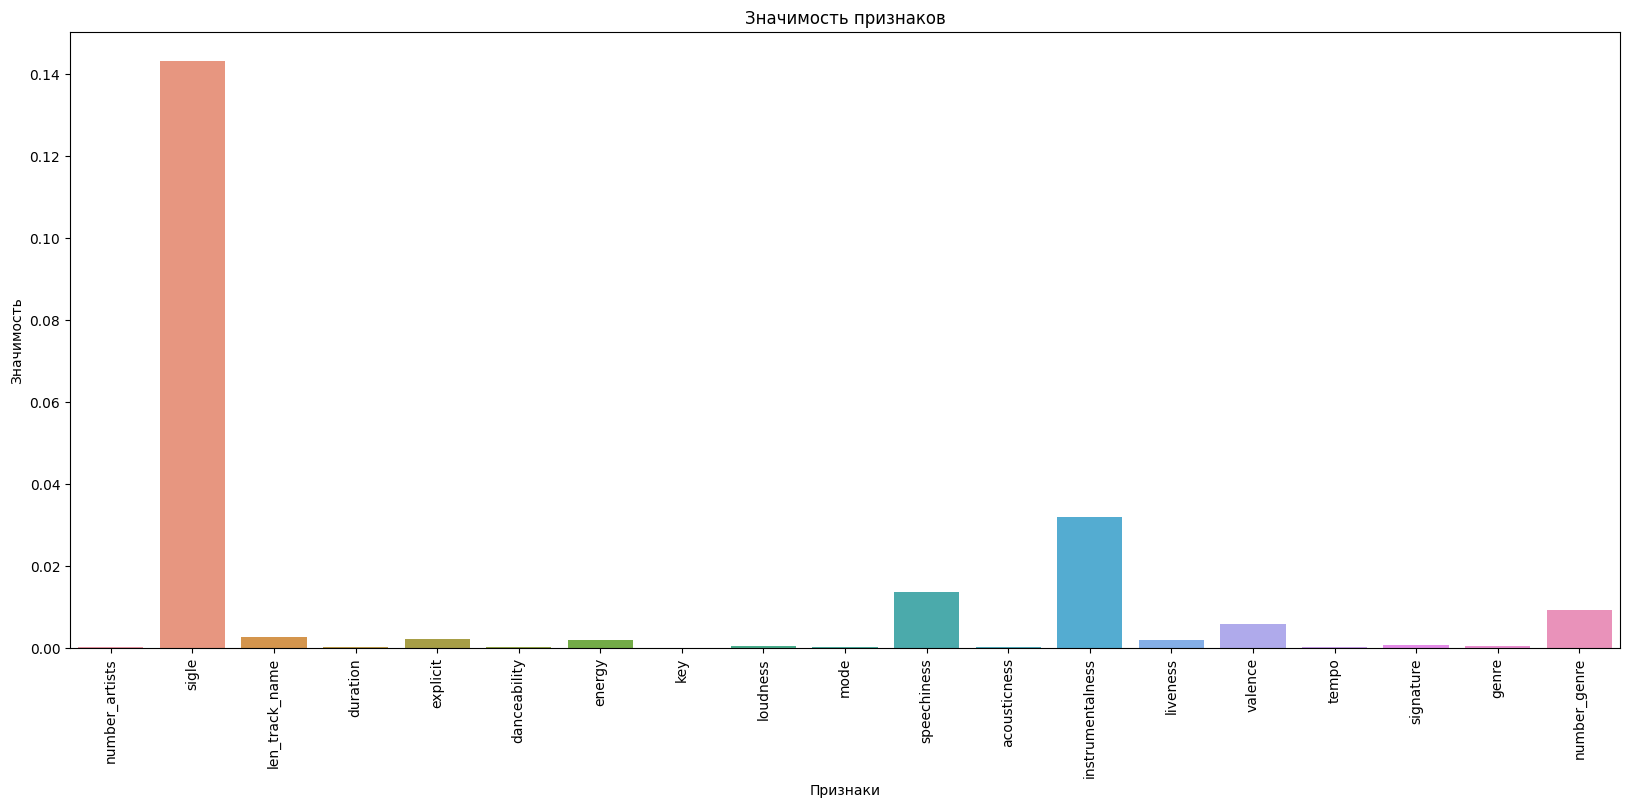

In [190]:
from sklearn.inspection import permutation_importance
# Разделение на обучающую и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=42)

# Создание модели с заданными параметрами
linear_reg = LinearRegression()

# Обучение модели
linear_reg.fit(X_train, y_train)

#Расчет значимости признаков
result = permutation_importance(linear_reg, x_std, y)

# Сортируем признаки по значимости
sorted_idx = result.importances_mean

# Вывод
plt.figure(figsize=(20, 8))
sns.barplot(x=features,y=sorted_idx)
plt.title('Значимость признаков')
plt.xlabel('Признаки')
plt.xticks(rotation=90)
plt.ylabel('Значимость')
plt.show()

***Определяющими признаками в модели является сингловость,в меньшей степени инструментальность, кол-во жанров и кол-во речи.***

* **Унаем как меняются оценки метрик при крос-валидации на каждом из фолдов.**

In [191]:
# Стандартизация данных
scaler_std = StandardScaler()
x_std = scaler_std.fit_transform(x)

# Создание модели с заданными параметрами
linear_reg = LinearRegression()

# Таблица для результатов
results = pd.DataFrame()
results['metrics'] = ['mae','mse','rmse','r2','smape', 'msle']

#Разделение на обучающую и тестовую выборки на основе кросс-валидации
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, test_idx) in enumerate(kfold.split(x_std)):
    X_train, X_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Обучение модели
    linear_reg.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = linear_reg.predict(X_test)
    
    # Считаем метрики
    mae = _mae(y_test, y_pred)
    mse = _mse(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = _r2(y_test, y_pred)
    smape = _smape(y_test, y_pred)
    msle =_msle(y_test, y_pred)
    fold += 1
    results[fold] = [mae, mse, rmse, r2, mape, msle]

# Выод оценок метрик
results

,metrics,1,2,3,4,5
0,mae,17.904060,17.626254,17.790100,17.832499,17.752085
1,mse,460.915181,452.058266,457.508412,459.122670,458.000250
2,rmse,21.468935,21.261662,21.389446,21.427148,21.400940
3,r2,0.099024,0.103484,0.100471,0.098033,0.104114
4,smape,inf,inf,inf,inf,inf
5,msle,2.177012,2.089494,2.120674,2.154175,2.135925


***Большинство метрик показывают минимальное значение ошибок на 2-ом фолде из 5-ти***

* **Определим зависимость значений метрик от количества фолдов**

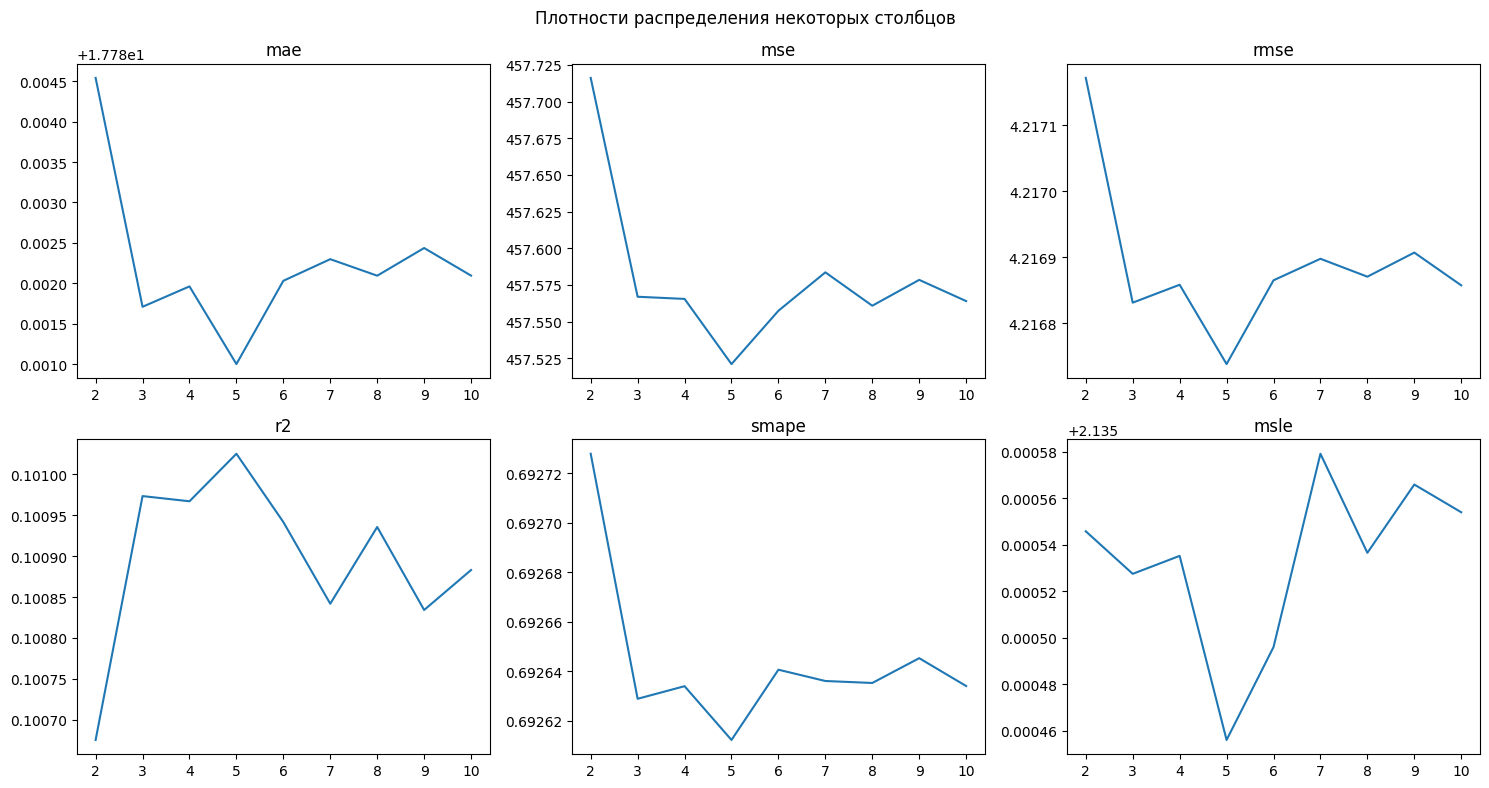

,metrics,2,3,4,5,6,7,8,9,10
0,mae,17.784541,17.781709,17.781961,17.781000,17.782030,17.782298,17.782093,17.782436,17.782094
1,mse,457.716160,457.566878,457.565405,457.520956,457.557329,457.583524,457.560761,457.578391,457.563921
2,rmse,4.217172,4.216831,4.216858,4.216738,4.216865,4.216898,4.216871,4.216907,4.216857
3,r2,0.100675,0.100973,0.100967,0.101025,0.100942,0.100842,0.100936,0.100834,0.100883
4,smape,0.692728,0.692629,0.692634,0.692612,0.692641,0.692636,0.692635,0.692645,0.692634
5,msle,2.135546,2.135527,2.135535,2.135456,2.135496,2.135579,2.135537,2.135566,2.135554


In [192]:
# Число фолдов
K=range(2,11)

# Таблица для результатов
linear_results = pd.DataFrame()
linear_results['metrics'] = ['mae','mse','rmse','r2','smape', 'msle']

# Создание модели с заданными параметрами
linear_reg = LinearRegression()

for k in K:
     # Словарь оценок метрик по фолодам
    scores ={'mae': [],'mse': [],'rmse': [],'r2':[],'smape': [], 'msle': []}

    #Разделение на обучающую и тестовую выборки на основе кросс-валидации
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    for fold, (train_idx, test_idx) in enumerate(kfold.split(x_std)):
        X_train, X_test = x[train_idx], x[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
    
        # Обучение модели
        linear_reg.fit(X_train, y_train)
    
        # Предсказание на тестовой выборке
        y_pred = linear_reg.predict(X_test)
        
        # Считаем метрики
        scores['mae'].append(_mae(y_test, y_pred))
        scores['mse'].append(_mse(y_test, y_pred))
        scores['rmse'].append(_mae(y_test, y_pred) ** 0.5)
        scores['r2'].append(_r2(y_test, y_pred))
        scores['smape'].append(_smape(y_test, y_pred))
        scores['msle'].append(_msle(y_test, y_pred))
        
    result= []   
    for key, values in scores.items():
        result.append(np.mean(values))
    linear_results[k] = result

ax = [[0, 0],[0, 1],[0, 2],[1, 0],[1, 1],[1, 2]]
# Выод оценок метрик 
fig, axes = plt.subplots(2, 3, figsize=(15, 8)) #строки,колонки
for item, value in enumerate(ax):
    row = linear_results.loc[item]
    metric = row[0:1:]
    result = row[1::]
    axes[value[0],value[1]].plot(result)
    axes[value[0],value[1]].set_title(str(metric[0]))
fig.suptitle('Плотности распределения некоторых столбцов') 
plt.tight_layout() 
plt.show()
linear_results

***Лучший вариант - это 5 фолдов***

# Модель случайного леса

**Применим также модель случайного леса(ВАЖНО, я не смог применить ни какие встроенные методы sklearn, для подбора гиперпараметров, либо я что-то делал не так, либо нужно что-то мощнее ноутбука)**


In [193]:
from sklearn.ensemble import RandomForestClassifier

#Разделение на обучающую и тестовую выборки 
X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=42)

# Создание модели и настройка с использованием решетчатого поиска
random_forest = RandomForestClassifier()

# Словарь оценок метрик по фолодам
random_scores ={'mae': [],'mse': [],'rmse': [],'r2':[],'smape': [], 'msle': []}

# Обучение модели
random_forest.fit(X_train, y_train)
# Предсказание на тестовой выборке
y_pred = random_forest.predict(X_test)

# Считаем метрики
random_scores['mae'].append(_mae(y_test, y_pred))
random_scores['mse'].append(_mse(y_test, y_pred))
random_scores['rmse'].append(_mae(y_test, y_pred) ** 0.5)
random_scores['r2'].append(_r2(y_test, y_pred))
random_scores['smape'].append(_smape(y_test, y_pred))
random_scores['msle'].append(_msle(y_test, y_pred))
random_scores

{'mae': [10.320146215065703],
 'mse': [390.4611789746437],
 'rmse': [3.212498438142142],
 'r2': [0.23674393783498993],
 'smape': [0.4753962288909357],
 'msle': [1.969169427859485]}

***К сожалению кросс-валидация у меня не грузится, но мы даже без подбора гиперпараметров получили сравнительно неплохие результаты по сравнению с линейной регрессией.***

# Полиномиальная регрессия

In [194]:
from sklearn.preprocessing import PolynomialFeatures

# Словать оценок для каждой метрики 
poly_scores ={'mae': [],'mse': [],'rmse': [],'r2':[],'smape': [], 'msle': []}

# Создание модели с заданными параметрами
poly_features = PolynomialFeatures()
x_poly = poly_features.fit_transform(x)
linear_reg = LinearRegression()

#Разделение на обучающую и тестовую выборки 
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

# Обучение модели
linear_reg.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = linear_reg.predict(X_test)

# Считаем метрики
poly_scores['mae'].append(_mae(y_test, y_pred))
poly_scores['mse'].append(_mse(y_test, y_pred))
poly_scores['rmse'].append(_mae(y_test, y_pred) ** 0.5)
poly_scores['r2'].append(_r2(y_test, y_pred))
poly_scores['smape'].append(_smape(y_test, y_pred))
poly_scores['msle'].append(_msle(y_test, y_pred))
poly_scores


{'mae': [16.53735484241421],
 'mse': [418.64018113776893],
 'rmse': [4.066614666084582],
 'r2': [0.18166088378273815],
 'smape': [0.6652011472094506],
 'msle': [2.021106867833251]}

# Итог

***Не смотря на то что у меня не получилось сделать кросс-валидацию и подобрать гиперпараметры модель случайного дерева показала высокую метрику R2 и низкие метрики ошибок.***